#  BURHAN GÖK  - TÜRKİYE TERÖR SALDIRILARI ANALİZİ (1996-2016)

##### DataSet'e  Hızlı Bakış

Bu data sette 1996 ile 2016 yılları arasında gerçekleşen terör saldırılarının bilgisi bulunmaktadır.
Burada eylemi gerçekleştiren kişi, olayı üstlenen grup, ölü ve yaralı sayısı, zaman ve mekan bilgisinin yanında hedef bilgiside bulunmaktadır. 

Bu çalışmada ülkede geçmişte yaşanmış saldırıları türleri ve hedeflerine göre değerlendirip gelecekteki tehlikeler için nasıl önlem alınması hakkında bilgi sağlanması amaçlanmıştır. Saldırıların etkileri belirlenip ülkedeki güvenliği tehdit eden oluşumlar tespit edilmesi sağlanmaktadır.

Yapılan analizlerde Doğu Anadolu Bölgesinde nüfusu az olan şehirlerde güvenlik güçlerinin, nüfüsun yoğun olduğu metropol bölgelerde ise sivil halkın hedef alındığı tespit edilmiştir.Bunun yanında saldırıyı gerçekleştiren grupların ideolojilerine göre hedef yerler ve kişiler üzerinden eylem gerçekleştirmişlerdir.

https://tr.wikipedia.org/wiki/T%C3%BCrkiye%27deki_intihar_sald%C4%B1r%C4%B1lar%C4%B1_listesi

### Hedeflerin Kodlanması
1 : Askeriye
2 : Emniyet 
3 : Diğer
4 : Sivil

In [110]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import statsmodels.formula.api as smf 
%matplotlib inline


# utf-8 ' gore karakterlerdeki hata onlenmektedir
import sys  
reload(sys)  
sys.setdefaultencoding('utf8')

In [111]:
#Data Kayıt Sayısı ve İlk 5 Kayıt
data= pd.read_csv('genelTablo.csv')

data.head()

,ID,Tarih,Yer,Eylemci,Cinsiyet,Sorumlu,Olu,Yarali,Hedef
0,1,30 Haziran 1996,Tunceli,Zeynep Kınacı,Kadın,PKK,9,29,1
1,2,25 Ekim 1996,Adana,Leyla Kaplan,Kadın,PKK,5,18,2
2,3,29 Ekim 1996,Sivas,Güler Otaş,Kadın,PKK,6,10,2
3,4,17 Kasım 1998,Hakkari,Fatma Özen,Kadın,PKK,2,5,1
4,5,1 Aralık 1998,Diyarbakır,Hüsniye Oruç,Kadın,PKK,1,14,1


In [112]:
print('Data Örnek Sayısı: '+ str(len(data)))

In [113]:
data.shape

(47, 9)

In [114]:
data.columns

Index([u'ID', u'Tarih', u'Yer', u'Eylemci', u'Cinsiyet', u'Sorumlu', u'Olu',
       u'Yarali', u'Hedef'],
      dtype='object')

Peki Bu Data Setteki Özellikler Nedir ?

- Tarih: Saldırının gerçekleştiği zaman bilgisi.
- Yer: Saldırının gerçekleştiği şehir bilgisi
- Eylemci: Eylemi yapan kişi/kişiler hakkındaki isim bilgisi
- Cinsiyet: Eylemi yapan kişi/kişilerin cinsiyeti
- Sorumlu: Saldırıyı üstelenen grubun adı
- Olu: Saldırıda ölenlerin sayısı
- Yarali:Saldırıda yaralananların sayısı
- Hedef: Saldırının amacı ve gerçekleştiği alan



In [115]:
#DataSetteki değişkenler
data.dtypes

ID           int64
Tarih       object
Yer         object
Eylemci     object
Cinsiyet    object
Sorumlu     object
Olu          int64
Yarali       int64
Hedef        int64
dtype: object

In [116]:
#Dataset Detaylı Bilgi
data.info()

In [117]:
#Istatistiksel degerler
data.describe()

,ID,Olu,Yarali,Hedef
count,47.000000,47.000000,47.000000,47.000000
mean,24.000000,12.617021,65.170213,2.234043
std,13.711309,20.165137,108.662685,1.046999
min,1.000000,1.000000,1.000000,1.000000
25%,12.500000,2.000000,10.000000,1.000000
50%,24.000000,4.000000,20.000000,2.000000
75%,35.500000,13.000000,69.500000,3.000000
max,47.000000,109.000000,500.000000,4.000000


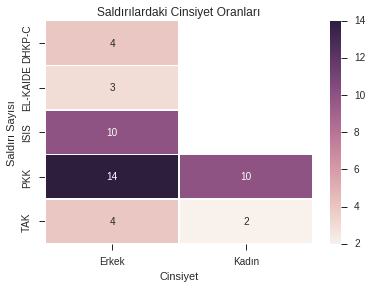

In [124]:
abc=data.pivot_table(index='Sorumlu', columns='Cinsiyet', values='ID', aggfunc='count')


#HeatMap İle Gösterimi
sns.heatmap(abc, annot=True, linewidths=.40)
plt.title("Saldırılardaki Cinsiyet Oranları")
plt.ylabel("Saldırı Sayısı")
plt.xlabel("Cinsiyet")
plt.show()

#### Data Set İçin Genel Grafik

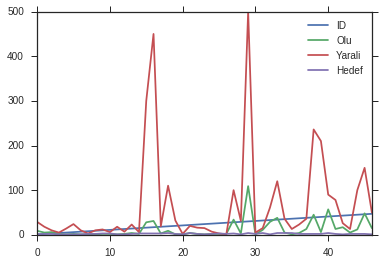

In [85]:
data.plot()
plt.show()

##### Ölüm Sayıları 

In [86]:
#1996-2016 Yılları Arası Saldırılarda Ölenlerin Sayısı
toplamOlumSayisi=data['Olu'].sum()
toplamOlumSayisi

593

In [87]:
#Saldırılardaki ölümlerin istatistiksel değerleri
data['Olu'].describe()

count     47.000000
mean      12.617021
std       20.165137
min        1.000000
25%        2.000000
50%        4.000000
75%       13.000000
max      109.000000
Name: Olu, dtype: float64

In [88]:
data['Olu'].var()

406.63274745605912

###### Ölüm Sayısının Çok Olduğu Eylemlerden İlk 10

In [89]:
data.sort_values(by='Olu', ascending=False)[:10]

,ID,Tarih,Yer,Eylemci,Cinsiyet,Sorumlu,Olu,Yarali,Hedef
29,30,10 Ekim 2015,Ankara,Yunus Emre Alagöz,Erkek,ISIS,109,500,4
40,41,20 Ağustos 2016,Gaziantep,NaN,Erkek,ISIS,57,90,4
45,46,10 Aralık 2016,İstanbul,Kadri Kılınç Burak Yavuz,Erkek,TAK,48,150,2
38,39,28 Haziran 2016,İstanbul,Rakim Bulgarov Vadim Osmanov,Erkek,ISIS,45,236,2
33,34,13 Mart 2016,Ankara,Seher Çağla Demir,Kadın,TAK,38,120,4
27,28,20 Temmuz 2015,Şanlıurfa,Şeyh Abdurrahman Alagöz,Erkek,ISIS,34,100,3
16,17,20 Kasım 2003,İstanbul,Feridun Uğurlu İlyas Kuncak,Erkek,EL-KAIDE,31,450,3
32,33,17 Şubat 2016,Ankara,Abdulbaki Sömer,Erkek,TAK,29,61,1
15,16,15 Kasım 2003,İstanbul,Mesut Çabuk Gökhan Elaltuntaş,Erkek,EL-KAIDE,28,300,3
42,43,9 Ekim 2016,Hakkari,Mümin Aras,Erkek,PKK,17,26,1


In [90]:
#1996-2016 Yılları Arası Saldırılarda Yaralanların Sayısı
toplamYaraliSayisi =data['Yarali'].sum()
toplamYaraliSayisi

3063

In [91]:
##Saldırılardaki yaralanmaların istatistiksel değerleri
data['Yarali'].describe()

count     47.000000
mean      65.170213
std      108.662685
min        1.000000
25%       10.000000
50%       20.000000
75%       69.500000
max      500.000000
Name: Yarali, dtype: float64

In [92]:
#Correlation Matrisi
data.corr()

,ID,Olu,Yarali,Hedef
ID,1.000000,0.365686,0.208679,0.196861
Olu,0.365686,1.000000,0.779185,0.359571
Yarali,0.208679,0.779185,1.000000,0.323905
Hedef,0.196861,0.359571,0.323905,1.000000


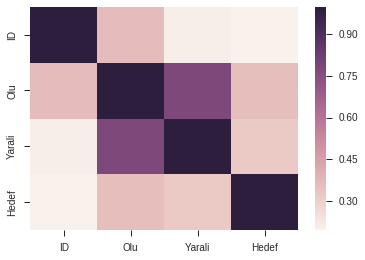

In [93]:
##Correlation Matrisi Heat Map İle
import seaborn as sns2
corr = data.corr()
sns2.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [94]:
#Burada OLS Regresyon Modeli Kullanıldı
#OLS Lineer Regresyon
data['ID'] = np.ones(( len(data), ))
Y = data.ID[:-1]
X = data[['Olu','Yarali']][:-1]
result = sm.OLS( Y, X ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ID   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     9.312
Date:                Thu, 25 May 2017   Prob (F-statistic):           0.000424
Time:                        08:12:39   Log-Likelihood:                -57.153
No. Observations:                  46   AIC:                             118.3
Df Residuals:                      44   BIC:                             122.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Olu            0.0136      0.010      1.389      0.172      -0.006       0.033
Yarali         0.0019      0.002      1.051      0.299      -0.002       0.006
==============================================================================
Omnibus:                       48.146   Durbin-Watson:                   0.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.870
Skew:                          -2.723   Prob(JB):                     2.41e-44
Kurtosis:                      11.669   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

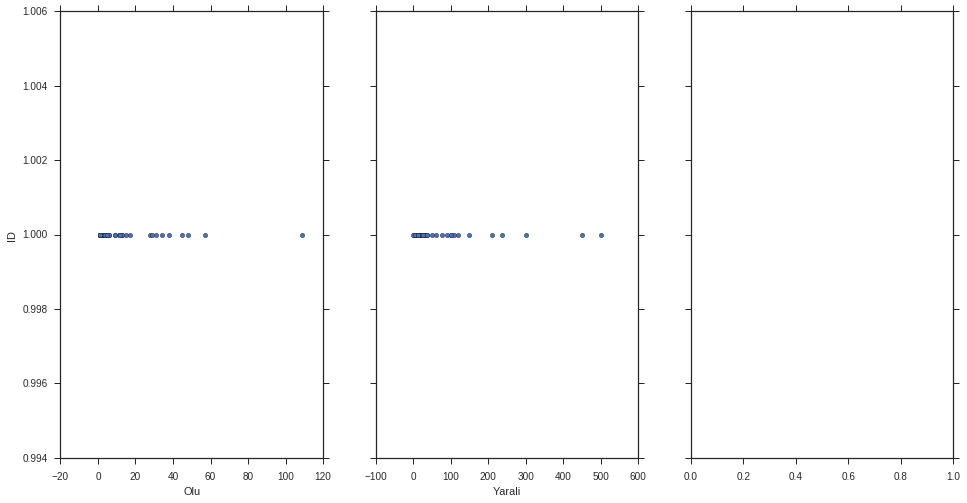

In [95]:
#Özellikler arası ilişkilendirme
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Olu', y='ID', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Yarali', y='ID', ax=axs[1])
plt.show()

### Selection Örneklemleri

Cinsiyete Göre Eylemci Analizleri Kolon Silme ,Ekleme, Temizleme ve Regresyon Analizleri

In [96]:
#Öncelikle Erkek ve Kadın Sayılarını Öğreniyoruz
print(data.Cinsiyet.value_counts())

In [97]:
# yeni bir feature oluşturuyoruz
#burada kadın eylemcileri belirleyip analizini yapacağız
data['IsFemale'] = data.Cinsiyet.map({'Erkek':0, 'Kadın':1})
data.head(15)

,ID,Tarih,Yer,Eylemci,Cinsiyet,Sorumlu,Olu,Yarali,Hedef,IsFemale
0,1.0,30 Haziran 1996,Tunceli,Zeynep Kınacı,Kadın,PKK,9,29,1,1
1,1.0,25 Ekim 1996,Adana,Leyla Kaplan,Kadın,PKK,5,18,2,1
2,1.0,29 Ekim 1996,Sivas,Güler Otaş,Kadın,PKK,6,10,2,1
3,1.0,17 Kasım 1998,Hakkari,Fatma Özen,Kadın,PKK,2,5,1,1
4,1.0,1 Aralık 1998,Diyarbakır,Hüsniye Oruç,Kadın,PKK,1,14,1,1
5,1.0,24 Aralık 1998,Van,Hamdiye Kapan,Kadın,PKK,2,24,1,1
6,1.0,4 Mart 1999,İstanbul,Maral Maymak,Kadın,PKK,1,10,1,1
7,1.0,20 Mart 1999,Van,Tacettin Şahin,Erkek,PKK,1,3,2,0
8,1.0,27 Mart 1999,İstanbul,Semiha Kılıç,Kadın,PKK,1,10,2,1
9,1.0,5 Nisan 1999,Bingöl,Baki Tatlı,Erkek,PKK,2,12,3,0


In [98]:
#Cinsiyet özelliği kaldırıyoruz. Burada eylemcilerin kadın olmasına bakacağız
data.drop('Cinsiyet', axis=1, inplace=True)
data.head(10)

,ID,Tarih,Yer,Eylemci,Sorumlu,Olu,Yarali,Hedef,IsFemale
0,1.0,30 Haziran 1996,Tunceli,Zeynep Kınacı,PKK,9,29,1,1
1,1.0,25 Ekim 1996,Adana,Leyla Kaplan,PKK,5,18,2,1
2,1.0,29 Ekim 1996,Sivas,Güler Otaş,PKK,6,10,2,1
3,1.0,17 Kasım 1998,Hakkari,Fatma Özen,PKK,2,5,1,1
4,1.0,1 Aralık 1998,Diyarbakır,Hüsniye Oruç,PKK,1,14,1,1
5,1.0,24 Aralık 1998,Van,Hamdiye Kapan,PKK,2,24,1,1
6,1.0,4 Mart 1999,İstanbul,Maral Maymak,PKK,1,10,1,1
7,1.0,20 Mart 1999,Van,Tacettin Şahin,PKK,1,3,2,0
8,1.0,27 Mart 1999,İstanbul,Semiha Kılıç,PKK,1,10,2,1
9,1.0,5 Nisan 1999,Bingöl,Baki Tatlı,PKK,2,12,3,0


##### Kadın Eylemcilerin Gerçekleştirdiği Saldırılar

In [99]:
Kadin_Eylemciler=data[data.IsFemale==True]
print("Kadin Eylemci Sayisi: " +str(len(Kadin_Eylemciler)))


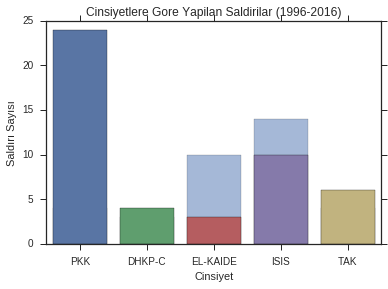

In [107]:
#Cinsiyete göre kümeleme işlemi ile yaptıkları saldırı sayısı
cinsiyetlerKumesi = data.groupby(["IsFemale",'Sorumlu'])['ID'].count().reset_index(name="Saldiri_Sayisi")
cinsiyetler_range = range(len(cinsiyetlerKumesi))
plt.bar(cinsiyetler_range,cinsiyetlerKumesi['Saldiri_Sayisi'] ,align='center',alpha=0.5)

sns.countplot(x= 'Sorumlu', data= data)
plt.xlabel("Cinsiyet")
plt.ylabel('Saldırı Sayısı')
plt.title('Cinsiyetlere Gore Yapilan Saldirilar (1996-2016)')
plt.show()

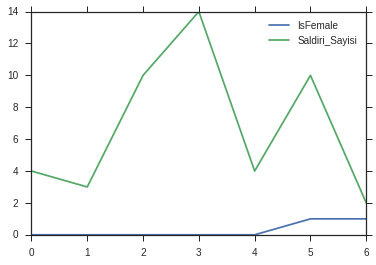

In [101]:
cinsiyetlerKumesi.plot()
plt.show()

Yukarıdaki tabloya baktığımızda örgütlerin ideolojileri ve eylemcilerin kadın olması birbirine bağımlı durumdadır. 
Radikal İslamcı olduğunu söyleyen grupların ideolojilerinden dolayı kadın eylemci kullanmadıkları görülmemiştir.
Kollektif yaşam gibi cinsiyet ayrımcılığa karşı olan gruplarında kadın eylemci kullanabildiği yukarıda görülmüştür.

In [102]:
#Regresyon Analizi
reg1 = smf.ols('ID ~ Olu+Yarali+IsFemale+Sorumlu', data=data).fit()
print (reg1.summary())

In [103]:
cinsiyetlerKumesi.describe()

,IsFemale,Saldiri_Sayisi
count,7.000000,7.000000
mean,0.285714,6.714286
std,0.487950,4.572173
min,0.000000,2.000000
25%,0.000000,3.500000
50%,0.000000,4.000000
75%,0.500000,10.000000
max,1.000000,14.000000


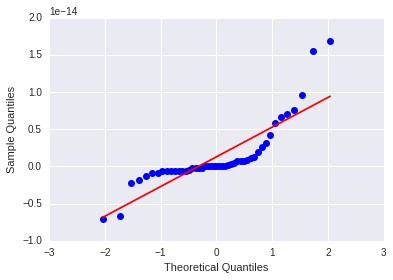

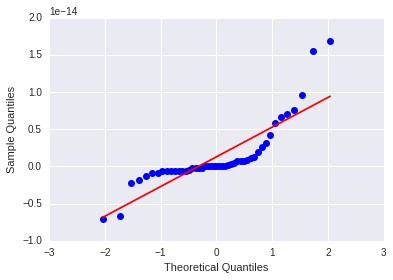

In [30]:
import statsmodels.api as sm
fig1=sm.qqplot(reg1.resid, line='r')
fig1

#### Pivot Tabloları ( İllere ve Örgütlere Göre )

Burada illerde gerçekleşen saldırılarda toplamda ölen kişilerin belirtildiği pivot tablosu görülmektedir.

Metropol illerde yapılan saldırılarda ölümler dah açok artmaktadır. Bunun da nedeni sivillerin çok olduğu yerde y ada merkezi yerlerde güvenlik güçlerine yapılan saldırılarda yoğunluktan daha fazla kişinin etkilenmesidir. 

In [31]:
illerdeOlumler=data.pivot_table(index='ID', columns='Yer', values='Olu', aggfunc='sum')
illerdeOlumler

Yer,Adana,Ankara,Antalya,Ağrı,Bingöl,Bursa,Diyarbakır,Elâzığ,Gaziantep,Hakkari,Kayseri,Sivas,Tunceli,Van,İstanbul,Şanlıurfa,Şırnak
ID,,,,,,,,,,,,,,,,,
1.0,6,187,1,3,6,1,13,6,67,22,17,6,9,6,196,34,13


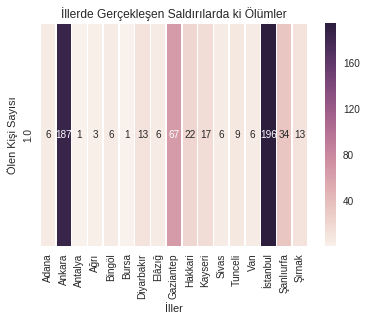

In [32]:
#HeatMap İle Gösterimi
sns.heatmap(illerdeOlumler, annot=True, fmt="d", linewidths=.40)
plt.title("İllerde Gerçekleşen Saldırılarda ki Ölümler")
plt.ylabel("Ölen Kişi Sayısı")
plt.xlabel("İller")
plt.show()

Burada ise örgütlerin illerde gerçekleştirdiği eylemlerdeki ölüm sonuçları görülmektedir.

Örgütler eylemlerini yapacakları illeri ideolojileri doğrultularında yapmaktadırlar

In [108]:
orgutlerIller=data.pivot_table(index='Sorumlu', columns='Cinsiyet', values='ID', aggfunc='sum')
orgutlerIller

KeyError: 'Cinsiyet'

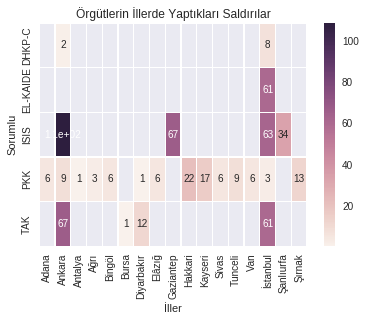

In [34]:
#Örgütlerin İllerde Yaptıkları Saldırı Sayılarının HeatMap İle Gösterimi
sns.heatmap(orgutlerIller, annot=True, linewidths=.40)
plt.title("Örgütlerin İllerde Yaptıkları Saldırılar")
plt.xlabel("İller")
plt.show()

Saldırılardaki genel ölüm sonuçları aşağıdaki grafikte gösterilmiştir.

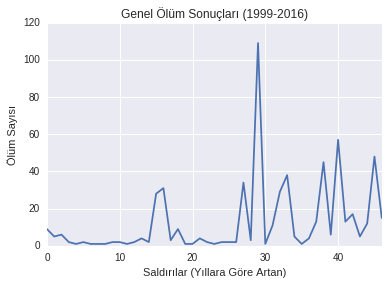

In [35]:
data.Olu.plot()
plt.xlabel("Saldırılar (Yıllara Göre Artan)")
plt.ylabel('Ölüm Sayısı')
plt.title('Genel Ölüm Sonuçları (1999-2016)')
plt.show()

###### Hedef Alanların Analizi

### Hedeflerin Kodlanması
1 : Askeriye
2 : Emniyet 
3 : Diğer
4 : Sivil

In [36]:
#Hedef Alanlara göre kümeleme işlemi ile yaptıkları saldırı sayısı
hedeflerKumesi = data.groupby(["Hedef"])['ID'].count().reset_index(name="Saldiri_Sayisi")

hedef_range = range(len(hedeflerKumesi))
hedeflerKumesi

,Hedef,Saldiri_Sayisi
0,1,13
1,2,18
2,3,8
3,4,8


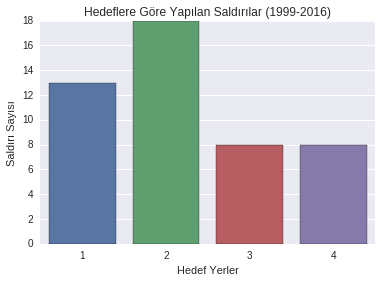

In [37]:
#Hedeflere göre yapilan saldilarin grafik çıktısı
import seaborn as sns4
sns4.countplot(x= 'Hedef', data= data)
plt.xlabel("Hedef Yerler")
plt.ylabel('Saldırı Sayısı')
plt.title('Hedeflere Göre Yapılan Saldırılar (1999-2016)')
plt.show()


Saldırılarda en çok Askeriye ve Emniyetin yer alması terörün ülkede ilk başladığı yıllarda göze çarpmaktadır.
Ancak son yıllarda yeni çıkan gruplar ile sivillere yönelik saldırıların arttığıda gözlemlenmektedir.

### Hedeflerin Kodlanması
1 : Askeriye
2 : Emniyet 
3 : Diğer
4 : Sivil

In [38]:
#Örgütlere göre kümeleme işlemi ile yaptıkları saldırı sayısı
orgutlerKumesi = data.groupby(["Sorumlu"])['ID'].count().reset_index(name="Saldiri_Sayisi")

orgut_range = range(len(orgutlerKumesi))
orgutlerKumesi

#plt.bar(orgut_range,orgutlerKumesi['Saldiri_Sayisi'] ,align='center',alpha=0.5)

#plt.ylabel('Saldiri Sayisi')
#plt.xlabel("Ustlenen Orgutler")
#plt.xticks(orgut_range,orgutlerKumesi['Sorumlu'])
#plt.title('Orgutlere Gore Yapilan Saldirilar (1996-2016)')
#plt.show()


,Sorumlu,Saldiri_Sayisi
0,DHKP-C,4
1,EL-KAIDE,3
2,ISIS,10
3,PKK,24
4,TAK,6


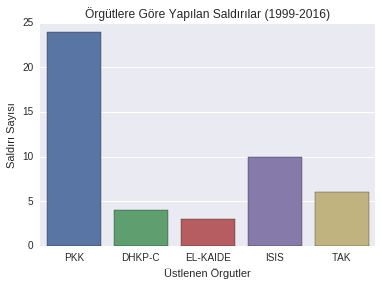

In [39]:
#Örgütlere göre yapilan saldilarin grafik çıktısı
sns.countplot(x= 'Sorumlu', data= data)
plt.xlabel("Üstlenen Örgutler")
plt.ylabel('Saldırı Sayısı')
plt.title('Örgütlere Göre Yapılan Saldırılar (1999-2016)')
plt.show()


##### İllere Göre İstatistiksel Değerler



Bu analizde illerin saldırılardan genel olarak nasıl etkilendiğini ve cinsiyetlere göre saldırıların etkisini görebilirsiniz.



In [40]:
sehirler=data.groupby(['Yer'])
sehirler.describe()

Hedef    ID   IsFemale         Olu      Yarali
Yer                                                                
Adana     count   2.000000   2.0   2.000000    2.000000    2.000000
          mean    1.500000   1.0   1.000000    3.000000   18.000000
          std     0.707107   0.0   0.000000    2.828427    0.000000
          min     1.000000   1.0   1.000000    1.000000   18.000000
          25%     1.250000   1.0   1.000000    2.000000   18.000000
          50%     1.500000   1.0   1.000000    3.000000   18.000000
          75%     1.750000   1.0   1.000000    4.000000   18.000000
          max     2.000000   1.0   1.000000    5.000000   18.000000
Ankara    count   5.000000   5.0   5.000000    5.000000    5.000000
          mean    3.200000   1.0   0.200000   37.400000  158.800000
          std     1.303840   0.0   0.447214   42.594601  196.305120
          min     1.000000   1.0   0.000000    2.000000    3.000000
          25%     3.000000   1.0   0.000000    9.000000   61.000000
          50%     4.000000   1.0   0.000000   29.000000  110.000000
          75%     4.000000   1.0   0.000000   38.000000  120.000000
          max     4.000000   1.0   1.000000  109.000000  500.000000
Antalya   count   1.000000   1.0   1.000000    1.000000    1.000000
          mean    1.000000   1.0   0.000000    1.000000    2.000000
          std          NaN   NaN        NaN         NaN         NaN
          min     1.000000   1.0   0.000000    1.000000    2.000000
          25%     1.000000   1.0   0.000000    1.000000    2.000000
          50%     1.000000   1.0   0.000000    1.000000    2.000000
          75%     1.000000   1.0   0.000000    1.000000    2.000000
          max     1.000000   1.0   0.000000    1.000000    2.000000
Ağrı      count   1.000000   1.0   1.000000    1.000000    1.000000
          mean    1.000000   1.0   0.000000    3.000000   31.000000
          std          NaN   NaN        NaN         NaN         NaN
          min     1.000000   1.0   0.000000    3.000000   31.000000
          25%     1.000000   1.0   0.000000    3.000000   31.000000
          50%     1.000000   1.0   0.000000    3.000000   31.000000
...                    ...   ...        ...         ...         ...
Van       std     1.000000   0.0   0.577350    1.000000   10.969655
          min     1.000000   1.0   0.000000    1.000000    3.000000
          25%     1.500000   1.0   0.000000    1.500000   11.000000
          50%     2.000000   1.0   0.000000    2.000000   19.000000
          75%     2.500000   1.0   0.500000    2.500000   21.500000
          max     3.000000   1.0   1.000000    3.000000   24.000000
İstanbul  count  15.000000  15.0  15.000000   15.000000   15.000000
          mean    2.333333   1.0   0.200000   13.066667   87.933333
          std     0.899735   0.0   0.414039   16.610955  136.124138
          min     1.000000   1.0   0.000000    1.000000    1.000000
          25%     2.000000   1.0   0.000000    2.000000    8.500000
          50%     2.000000   1.0   0.000000    4.000000   23.000000
          75%     3.000000   1.0   0.000000   20.500000   93.000000
          max     4.000000   1.0   1.000000   48.000000  450.000000
Şanlıurfa count   1.000000   1.0   1.000000    1.000000    1.000000
          mean    3.000000   1.0   0.000000   34.000000  100.000000
          std          NaN   NaN        NaN         NaN         NaN
          min     3.000000   1.0   0.000000   34.000000  100.000000
          25%     3.000000   1.0   0.000000   34.000000  100.000000
          50%     3.000000   1.0   0.000000   34.000000  100.000000
          75%     3.000000   1.0   0.000000   34.000000  100.000000
          max     3.000000   1.0   0.000000   34.000000  100.000000
Şırnak    count   1.000000   1.0   1.000000    1.000000    1.000000
          mean    2.000000   1.0   0.000000   13.000000   78.000000
          std          NaN   NaN        NaN         NaN         NaN
          min     2.000000   1.0   0.000000   13.000000   78.000000
         

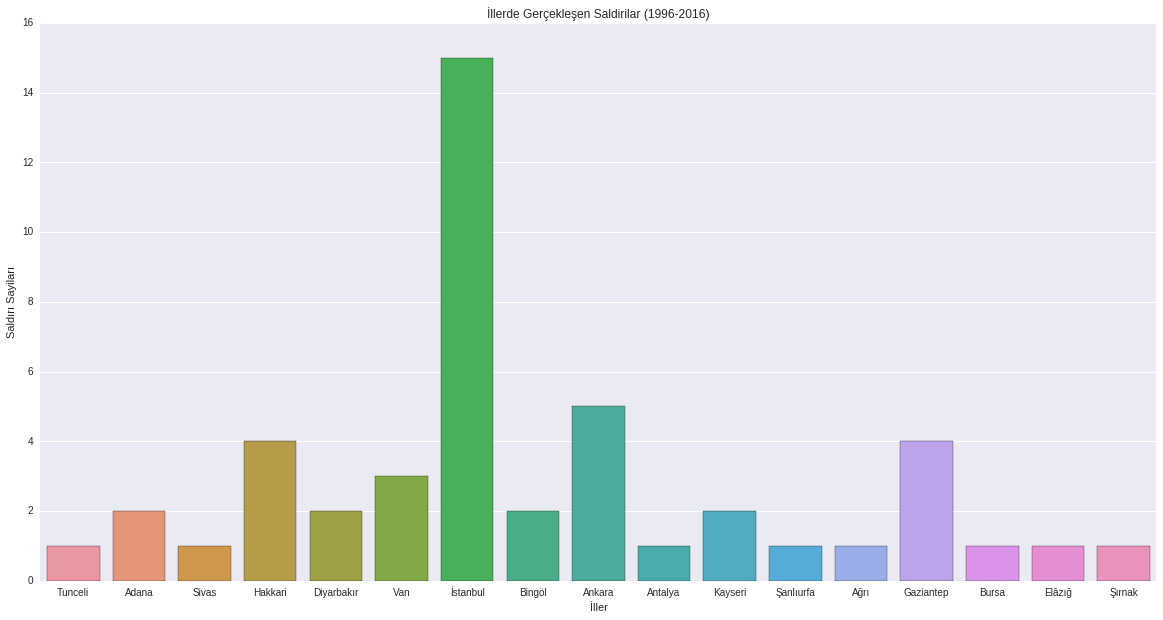

In [41]:
#Illere Gore Kumeleme
import seaborn as sns1
plt.figure(figsize=(20,10))
sns1.countplot(x= 'Yer', data= data)
plt.xlabel("İller")
plt.ylabel('Saldırı Sayiları')
plt.title('İllerde Gerçekleşen Saldirilar (1996-2016)')
plt.show()


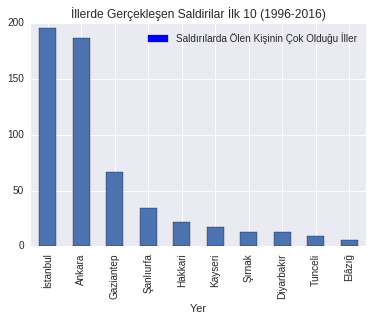

In [42]:
#En Çok Ölüm İle Sonuçlanan Saldırıların Olduğu İller
data.groupby("Yer").sum().sort("Olu",ascending = False).head(10).reset_index().plot(x="Yer",y = "Olu",kind = "bar")

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

cpatch = mpatches.Patch(color='blue', label='Saldırılarda Ölen Kişinin Çok Olduğu İller')
plt.legend(handles=[cpatch])
plt.title('İllerde Gerçekleşen Saldirilar İlk 10 (1996-2016)')


plt.show()

###### Ölüm ve Yaralı Sonuçlarının İlişkisi

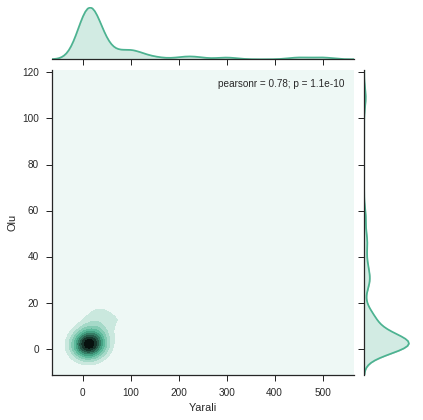

In [43]:
import seaborn as sns6

sns6.set(style="ticks")
x = data['Yarali']
y = data['Olu']
sns6.jointplot(x, y, kind="kde", color="#4CB391")
plt.show()

###### Kadın ve Erkeklerin Gerçekleştirdiği Saldırılardaki Ölüm Sonuçları

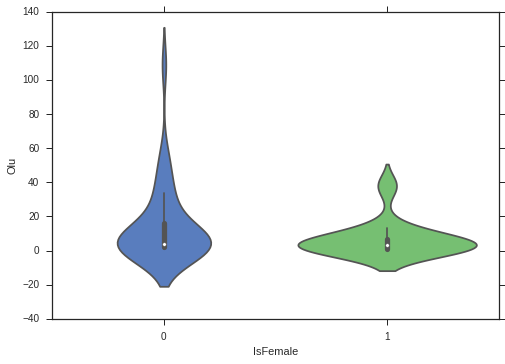

In [44]:
import seaborn as sns7
sns7.violinplot(x="IsFemale", y="Olu", data=data, palette="muted", split=True)
plt.show()

### Data Set Üzerindeki Kritik ve Anlamlı Değişiklik

##### Datada Tarih Özelliğimizin Yıl Kısmını Alıp Yeni Bir Özellik Oluşturuyoruz

In [45]:
data['Yil']=data.Tarih.apply(lambda x: str(x)[-4:])
data.tail()

,ID,Tarih,Yer,Eylemci,Sorumlu,Olu,Yarali,Hedef,IsFemale,Yil
42,1.0,9 Ekim 2016,Hakkari,Mümin Aras,PKK,17,26,1,0,2016
43,1.0,16 Ekim 2016,Gaziantep,Mehmet Kadir Cebael Muhammed Şerif,ISIS,5,13,2,0,2016
44,1.0,4 Kasım 2016,Diyarbakır,Kemal Hunres,TAK,12,100,2,0,2016
45,1.0,10 Aralık 2016,İstanbul,Kadri Kılınç Burak Yavuz,TAK,48,150,2,0,2016
46,1.0,17 Aralık 2016,Kayseri,Kasım Yıldırım Çakar,PKK,15,50,1,0,2016


##### Şimdi Yıllara Göre Analizler Yapılacaktır

In [46]:
data.Yil.describe()

count       47
unique      13
top       2016
freq        16
Name: Yil, dtype: object

In [47]:
#Yıl İçin Regresyon Analizi
regYil = smf.ols('ID ~ Yil+Olu+Yarali', data=data).fit()
print (regYil.summary())

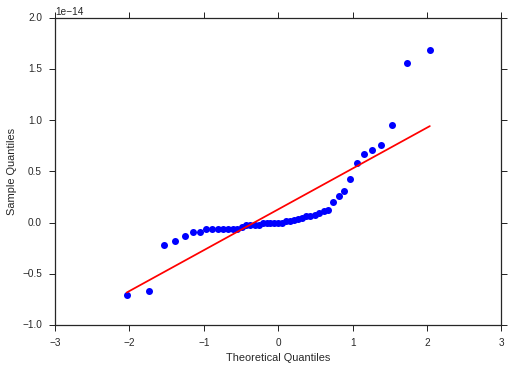

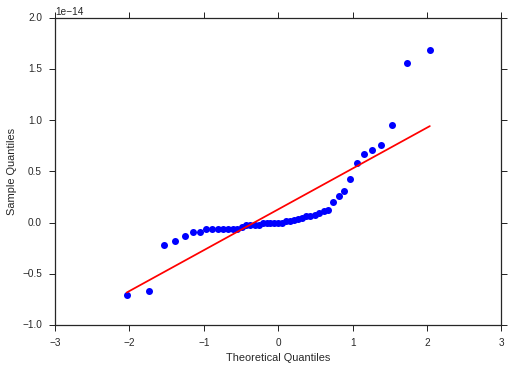

In [48]:
import statsmodels.api as sm
figYil=sm.qqplot(reg1.resid, line='r')
figYil

In [49]:
#Yıllara göre kümeleme işlemi ile yaptıkları saldırı sayısı
yillarKumesi = data.groupby(["Yil"])['ID'].count().reset_index(name="Saldiri_Sayisi")

yillar_range = range(len(yillarKumesi))
yillarKumesi

,Yil,Saldiri_Sayisi
0,1996,3
1,1998,3
2,1999,6
3,2001,2
4,2003,3
5,2006,1
6,2007,1
7,2010,1
8,2011,2
9,2012,3


#### Yıllara Ve Şehirlere Göre İstatistiksel Analiz

In [50]:
yilveSehir=data.groupby(['Yil','Yer'])
yilveSehir.describe()

Hedef   ID  IsFemale       Olu      Yarali
Yil  Yer                                                            
1996 Adana      count  1.000000  1.0  1.000000   1.00000    1.000000
                mean   2.000000  1.0  1.000000   5.00000   18.000000
                std         NaN  NaN       NaN       NaN         NaN
                min    2.000000  1.0  1.000000   5.00000   18.000000
                25%    2.000000  1.0  1.000000   5.00000   18.000000
                50%    2.000000  1.0  1.000000   5.00000   18.000000
                75%    2.000000  1.0  1.000000   5.00000   18.000000
                max    2.000000  1.0  1.000000   5.00000   18.000000
     Sivas      count  1.000000  1.0  1.000000   1.00000    1.000000
                mean   2.000000  1.0  1.000000   6.00000   10.000000
                std         NaN  NaN       NaN       NaN         NaN
                min    2.000000  1.0  1.000000   6.00000   10.000000
                25%    2.000000  1.0  1.000000   6.00000   10.000000
                50%    2.000000  1.0  1.000000   6.00000   10.000000
                75%    2.000000  1.0  1.000000   6.00000   10.000000
                max    2.000000  1.0  1.000000   6.00000   10.000000
     Tunceli    count  1.000000  1.0  1.000000   1.00000    1.000000
                mean   1.000000  1.0  1.000000   9.00000   29.000000
                std         NaN  NaN       NaN       NaN         NaN
                min    1.000000  1.0  1.000000   9.00000   29.000000
                25%    1.000000  1.0  1.000000   9.00000   29.000000
                50%    1.000000  1.0  1.000000   9.00000   29.000000
                75%    1.000000  1.0  1.000000   9.00000   29.000000
                max    1.000000  1.0  1.000000   9.00000   29.000000
1998 Diyarbakır count  1.000000  1.0  1.000000   1.00000    1.000000
                mean   1.000000  1.0  1.000000   1.00000   14.000000
                std         NaN  NaN       NaN       NaN         NaN
                min    1.000000  1.0  1.000000   1.00000   14.000000
                25%    1.000000  1.0  1.000000   1.00000   14.000000
                50%    1.000000  1.0  1.000000   1.00000   14.000000
...                         ...  ...       ...       ...         ...
2016 Hakkari    std         NaN  NaN       NaN       NaN         NaN
                min    1.000000  1.0  0.000000  17.00000   26.000000
                25%    1.000000  1.0  0.000000  17.00000   26.000000
                50%    1.000000  1.0  0.000000  17.00000   26.000000
                75%    1.000000  1.0  0.000000  17.00000   26.000000
                max    1.000000  1.0  0.000000  17.00000   26.000000
     Kayseri    count  1.000000  1.0  1.000000   1.00000    1.000000
                mean   1.000000  1.0  0.000000  15.00000   50.000000
                std         NaN  NaN       NaN       NaN         NaN
                min    1.000000  1.0  0.000000  15.00000   50.000000
                25%    1.000000  1.0  0.000000  15.00000   50.000000
                50%    1.000000  1.0  0.000000  15.00000   50.000000
                75%    1.000000  1.0  0.000000  15.00000   50.000000
                max    1.000000  1.0  0.000000  15.00000   50.000000
     İstanbul   count  5.000000  5.0  5.000000   5.00000    5.000000
                mean   2.800000  1.0  0.200000  24.40000   94.600000
                std    1.095445  0.0  0.447214  20.41568   95.219746
                min    2.000000  1.0  0.000000   5.00000   15.000000
                25%    2.000000  1.0  0.000000  11.00000   36.000000
                50%    2.000000  1.0  0.000000  13.00000   36.000000
                75%    4.000000  1.0  0.000000  45.00000  150.000000
                max    4.000000  1.0  1.000000  48.00000  236.000000
     Şırnak     count  1.000000  1.0  1.000000   1.00000    1.000000
                mean   2.000000  1.0  0.000000  13.00000   78.000000
                std         NaN  NaN       NaN       NaN         NaN
                min    2

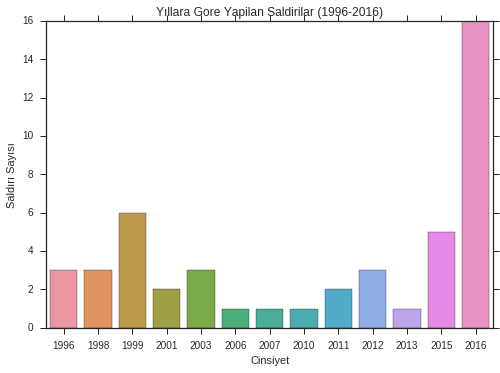

In [51]:
#Yıllara Göre Yapılan Saldırıların Grafiği Matplit İle
#plt.bar(yillar_range,yillarKumesi['Saldiri_Sayisi'] ,align='center',alpha=0.5)
#plt.ylabel('Saldiri Sayisi')
#plt.xlabel("Yıllar")
#plt.xticks(yillar_range,yillarKumesi['Yil'])
#plt.title('Yıllara Gore Yapilan Saldirilar (1996-2016)')
#figsize=(32, 32)
#plt.show()


sns.countplot(x= 'Yil', data= data)
plt.xlabel("Cinsiyet")
plt.ylabel('Saldırı Sayısı')
plt.title('Yıllara Gore Yapilan Saldirilar (1996-2016)')
plt.show()


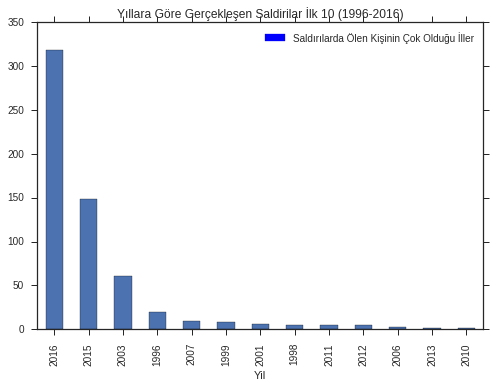

In [52]:

#En Çok Ölüm İle Sonuçlanan Saldırıların Olduğu Yıllar
data.groupby("Yil").sum().sort("Olu",ascending = False).head(20).reset_index().plot(x="Yil",y = "Olu",kind = "bar")

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

cpatch = mpatches.Patch(color='blue', label='Saldırılarda Ölen Kişinin Çok Olduğu İller')
plt.legend(handles=[cpatch])
plt.title('Yıllara Göre Gerçekleşen Saldirilar İlk 10 (1996-2016)')


plt.show()

### Yıllara Göre Örgütlerin Gerçekleştirdiği Eylemler


In [53]:
yillarveOrgutler=data.groupby(['Yil','Sorumlu'])
yillarveOrgutler.describe()

Hedef   ID  IsFemale        Olu      Yarali
Yil  Sorumlu                                                      
1996 PKK     count  3.000000  3.0  3.000000   3.000000    3.000000
             mean   1.666667  1.0  1.000000   6.666667   19.000000
             std    0.577350  0.0  0.000000   2.081666    9.539392
             min    1.000000  1.0  1.000000   5.000000   10.000000
             25%    1.500000  1.0  1.000000   5.500000   14.000000
             50%    2.000000  1.0  1.000000   6.000000   18.000000
             75%    2.000000  1.0  1.000000   7.500000   23.500000
             max    2.000000  1.0  1.000000   9.000000   29.000000
1998 PKK     count  3.000000  3.0  3.000000   3.000000    3.000000
             mean   1.000000  1.0  1.000000   1.666667   14.333333
             std    0.000000  0.0  0.000000   0.577350    9.504385
             min    1.000000  1.0  1.000000   1.000000    5.000000
             25%    1.000000  1.0  1.000000   1.500000    9.500000
             50%    1.000000  1.0  1.000000   2.000000   14.000000
             75%    1.000000  1.0  1.000000   2.000000   19.000000
             max    1.000000  1.0  1.000000   2.000000   24.000000
1999 PKK     count  6.000000  6.0  6.000000   6.000000    6.000000
             mean   2.000000  1.0  0.500000   1.333333    9.833333
             std    0.894427  0.0  0.547723   0.516398    5.154286
             min    1.000000  1.0  0.000000   1.000000    3.000000
             25%    1.250000  1.0  0.000000   1.000000    7.000000
             50%    2.000000  1.0  0.500000   1.000000   10.000000
             75%    2.750000  1.0  1.000000   1.750000   11.500000
             max    3.000000  1.0  1.000000   2.000000   18.000000
2001 DHKP-C  count  2.000000  2.0  2.000000   2.000000    2.000000
             mean   1.500000  1.0  0.000000   3.000000   15.000000
             std    0.707107  0.0  0.000000   1.414214   11.313708
             min    1.000000  1.0  0.000000   2.000000    7.000000
             25%    1.250000  1.0  0.000000   2.500000   11.000000
             50%    1.500000  1.0  0.000000   3.000000   15.000000
...                      ...  ...       ...        ...         ...
2015 PKK     std         NaN  NaN       NaN        NaN         NaN
             min    1.000000  1.0  0.000000   3.000000   31.000000
             25%    1.000000  1.0  0.000000   3.000000   31.000000
             50%    1.000000  1.0  0.000000   3.000000   31.000000
             75%    1.000000  1.0  0.000000   3.000000   31.000000
             max    1.000000  1.0  0.000000   3.000000   31.000000
2016 ISIS    count  6.000000  6.0  6.000000   6.000000    6.000000
             mean   3.000000  1.0  0.000000  21.166667   68.833333
             std    1.095445  0.0  0.000000  23.549239   86.702749
             min    2.000000  1.0  0.000000   4.000000   13.000000
             25%    2.000000  1.0  0.000000   5.000000   17.000000
             50%    3.000000  1.0  0.000000   8.000000   29.500000
             75%    4.000000  1.0  0.000000  36.500000   76.500000
             max    4.000000  1.0  0.000000  57.000000  236.000000
     PKK     count  4.000000  4.0  4.000000   4.000000    4.000000
             mean   1.500000  1.0  0.000000  12.750000   91.000000
             std    0.577350  0.0  0.000000   4.787136   82.129978
             min    1.000000  1.0  0.000000   6.000000   26.000000
             25%    1.000000  1.0  0.000000  11.250000   44.000000
             50%    1.500000  1.0  0.000000  14.000000   64.000000
             75%    2.000000  1.0  0.000000  15.500000  111.000000
             max    2.000000  1.0  0.000000  17.000000  210.000000
     TAK     count  6.000000  6.0  6.000000   6.000000    6.000000
             mean   2.500000  1.0  0.333333  23.500000   80.000000
             std    1.224745  0.0  0.516398  17.829750   52.318257
             min    1.000000  1.0  0.000000   1.000000   13.000000
             25%    2.000000  1.0  0.000000  12.250000   42.250000
   

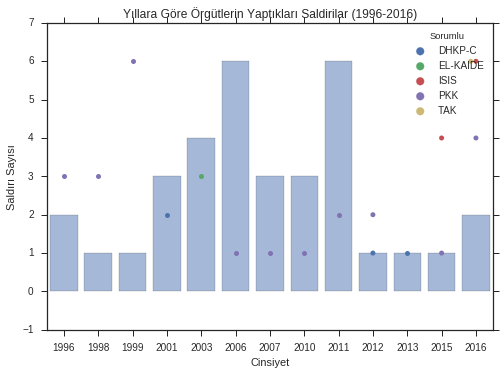

In [54]:
#Yıllara göre göre örgütlerin yaptıkları saldırı sayısı
orgutlerveYillarKumesi = data.groupby(['Sorumlu','Yil'])['ID'].count().reset_index(name="Saldiri_Sayisi")

orgutveYil_range = range(len(yillarveOrgutler))
orgutlerveYillarKumesi

plt.bar(orgutveYil_range,orgutlerveYillarKumesi['Saldiri_Sayisi'] ,align='center',alpha=0.5)

sns.swarmplot(x="Yil", y="Saldiri_Sayisi", hue="Sorumlu", data=orgutlerveYillarKumesi);
plt.xlabel("Cinsiyet")
plt.ylabel('Saldırı Sayısı')
plt.title('Yıllara Göre Örgütlerin Yaptıkları Saldirilar (1996-2016)')
plt.show()



###### Yıllara Göre Yapılan Saldırıların Yoğunluk Haritası

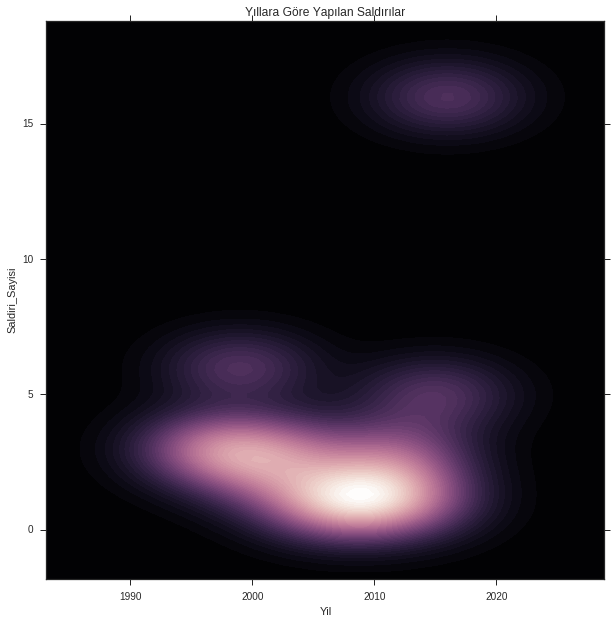

In [55]:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(yillarKumesi.Yil, yillarKumesi.Saldiri_Sayisi, cmap=cmap, n_levels=60, shade=True);
plt.title("Yıllara Göre Yapılan Saldırılar")
plt.show()

In [56]:
# Regression SKLEARN

In [57]:
feature_cols = ['Yil', 'Olu','Yarali','IsFemale']
X= data[feature_cols]
y= data['Hedef']

In [58]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV

In [59]:
from sklearn.linear_model import LinearRegression
#Ogrenme burada gerceklesiyor
lm = LinearRegression()
lm.fit(X, y)
lm.intercept_, lm.coef_

(-26.333816669593283,
 array([ 0.01414887,  0.01125682,  0.00109251, -0.2629862 ]))

In [60]:
zp = zip(feature_cols, lm.coef_)
dict(zp)

{'IsFemale': -0.26298619754353436,
 'Olu': 0.011256818705864686,
 'Yarali': 0.0010925095200201591,
 'Yil': 0.014148874800756337}

In [61]:
# R square değeri hesaplanıyor
lm.score(X, y)

0.16657853064924921

###### GaussianNB Yöntemi İle Learning

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.4, random_state=99)

clf = GaussianNB()

clf.fit(X_train, y_train) 

clf.score(X_test,y_test) 

0.36842105263157893

In [63]:
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy       

0.36842105263157893

In [64]:
scoresAcc= cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Accuracy : "+ str(list(scoresAcc)))
print('Mean:%.2f' %scoresAcc.mean())


# SONUÇ

Bu çalışmada öncelikle hazır bir dataset üzerinde çalışmadığımı belirtmek isterim. Giriş bölümde de belirttiğim Wikipedia
sayfasından aldığım dataları Emniyet Genel Müdürlüğünün kaynaklarından teyit ederek tablonun en son halini elde ettim. Böyle bir data üzerinde spesifik bir çalışma olmadığı için kendim birkaç farklı analizler yaptığımıda belirtmek isterim.

Elde ettiğim datalarda örgütlerin ideolojilerine göre eylemleri gerçekleştirdiği görülmektedir. Örneğin siyasi örgütlerin eylemci kullanırken Kadın- Erkek ayrımı yapmazken dini örgütler bu konuda çok katı kurlalı davranarak tüm eylemlerde Erkek eylemci kullanmıştır. Buradan ciddi bir istihbarat bilgisi çıkmaktadır. Örgütlerin bu yaklaşımlarına göre potansiyel eylemci ayırt edilebilir. 

Bir diğer çarpıcı özellikte PKK 1996-1999 yıllarında Kadın eylemciler ile saldırılar gerçekleştirirken daha sonra Erkek eylemciler ile saldırılar gerçekleştirmiştir.Yakın yıllarda PKK örgütünden ayrılan TAK adlı örgüt son yıllarda Kadın eylemcilerde kullanmıştır. Bunları yukarıda ilgili grafiklerde görebilirsiniz. 

Bu demek oluyor ki DHKPC, TAK ve PKK gibi siyasi örgütler gelecekte Kadın eylemciler ile saldırılar yapacaktır. Bu örgütlerin sivillere yönelik eylemleri de dikkat çekmektedir.

Bir analiz de dini örgüt olduğunu iddia eden ISIS daha önceki dini örgütlerin de yaptığı gibi ülkemizdeki yabancı başta olmak üzere devlet makamlarına saldırı yapmasıdır. 

Bu ülkenin İstanbul gibi yoğun şehirlerin hedef noktasında olduğunu göstermektedir.

Yarali ve Olu sayılarının ilişkilerine bakıldığında olayların etkisi daha net görülmektedir.

###### Son olarak örgütlerin eylem yapmadan önceki düşünceleri hakkındaki çıkardığım analizler aşağıda belirtilmiştir.

PKK seçimden önceki zamanlarda aidatını iddia ettiği Kürt kökenli vatandaşların yaşadığı bölgede oy ve güven kaybı yaşamamak için eylem gerçekleştirmektedir. Ancak ülkenin batısında rahat bir şekilde düşman toprakları psikolojisi ile kendi tarafını güçlendirmek için eylemler gerçekleştirmektedir.

ISIS hüküm sürdüğü topraklarda kendisinden kaçan insanların ülkemizde yaşadığı yerlerde gözdağı vermek amacıyla eylemler gerçekleştirmektedir. Bunun yanında ülkemizin ISIS ile mücadelelerine karşılık vermek amacıyla ülkenin önemli yerlerindede Dünya'ya gücünü göstermek amacıyla saldırılar yapmaktadır.

###### Burhan GÖK